<a href="https://colab.research.google.com/github/zeynebgh/CKPT1/blob/main/checkpoint5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

df = pd.read_csv('/content/titanic-passengers (1).csv',sep=";")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [ ]:
df=df.drop(columns='Cabin', axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())


In [ ]:

df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,S
6,576,No,3,"Patchett, Mr. George",male,19.000000,0,0,358585,14.5000,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,S


In [ ]:
df['Embarked'].mode()

0    S
dtype: object

In [ ]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [ ]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

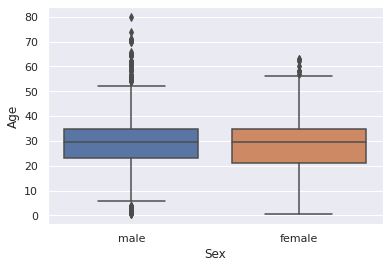

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x='Sex', y='Age')

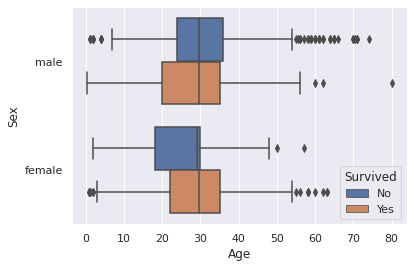

In [ ]:
sns.boxplot(data=df, x='Age', y='Sex', hue ='Survived')

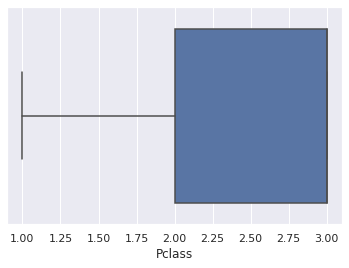

In [ ]:
sns.boxplot(data=df, x='Pclass', hue ='Survived')

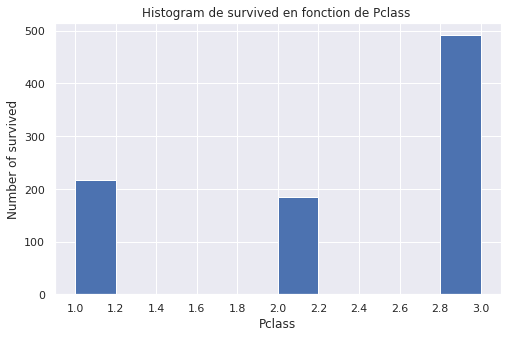

In [ ]:
count, bin_edges = np.histogram(df['Pclass'])

df['Pclass'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram de survived en fonction de Pclass ') # add a title to the histogram
plt.ylabel('Number of survived') # add y-label
plt.xlabel('Pclass') # add x-label

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


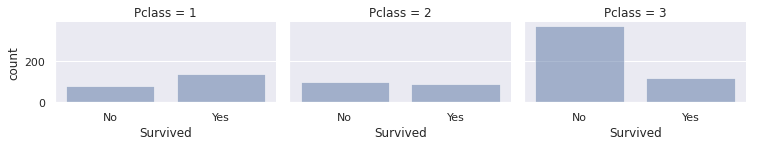

In [ ]:
grid = sns.FacetGrid(df, col="Pclass", size=2.2, aspect=1.6)
grid.map(sns.countplot, "Survived", alpha=.5)
grid.add_legend()

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

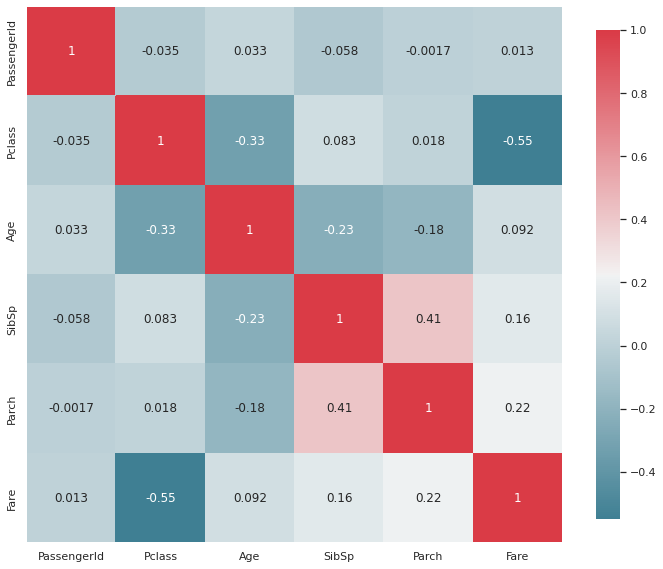

In [ ]:
plot_correlation_map( df )

the correlation between ''Fare'' and ''Pclass'' is -0.55, which indicates that they're strongly negatively correlated. 
More Fare is associated with less Pclass 

In [ ]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Survived"]=le.fit_transform(df[ "Survived"].values)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,C
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,S


In [ ]:
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
import re 
t=[]
for i in df['Name'] :
    title=i.split(', ')
    t.append(title[1])
t
titles=[]
for i in t:
    title=i.split('.')
    titles.append(title[0])
titles
df['titles']=titles
df
df=df.drop(['Name'],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles
0,343,0,2,male,28.000000,0,0,248740,13.0000,S,Mr
1,76,0,3,male,25.000000,0,0,348123,7.6500,S,Mr
2,641,0,3,male,20.000000,0,0,350050,7.8542,S,Mr
3,568,0,3,female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,male,22.000000,0,0,2669,7.2292,C,Mr
888,535,0,3,female,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,male,29.699118,0,0,349215,7.8958,S,Mr


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


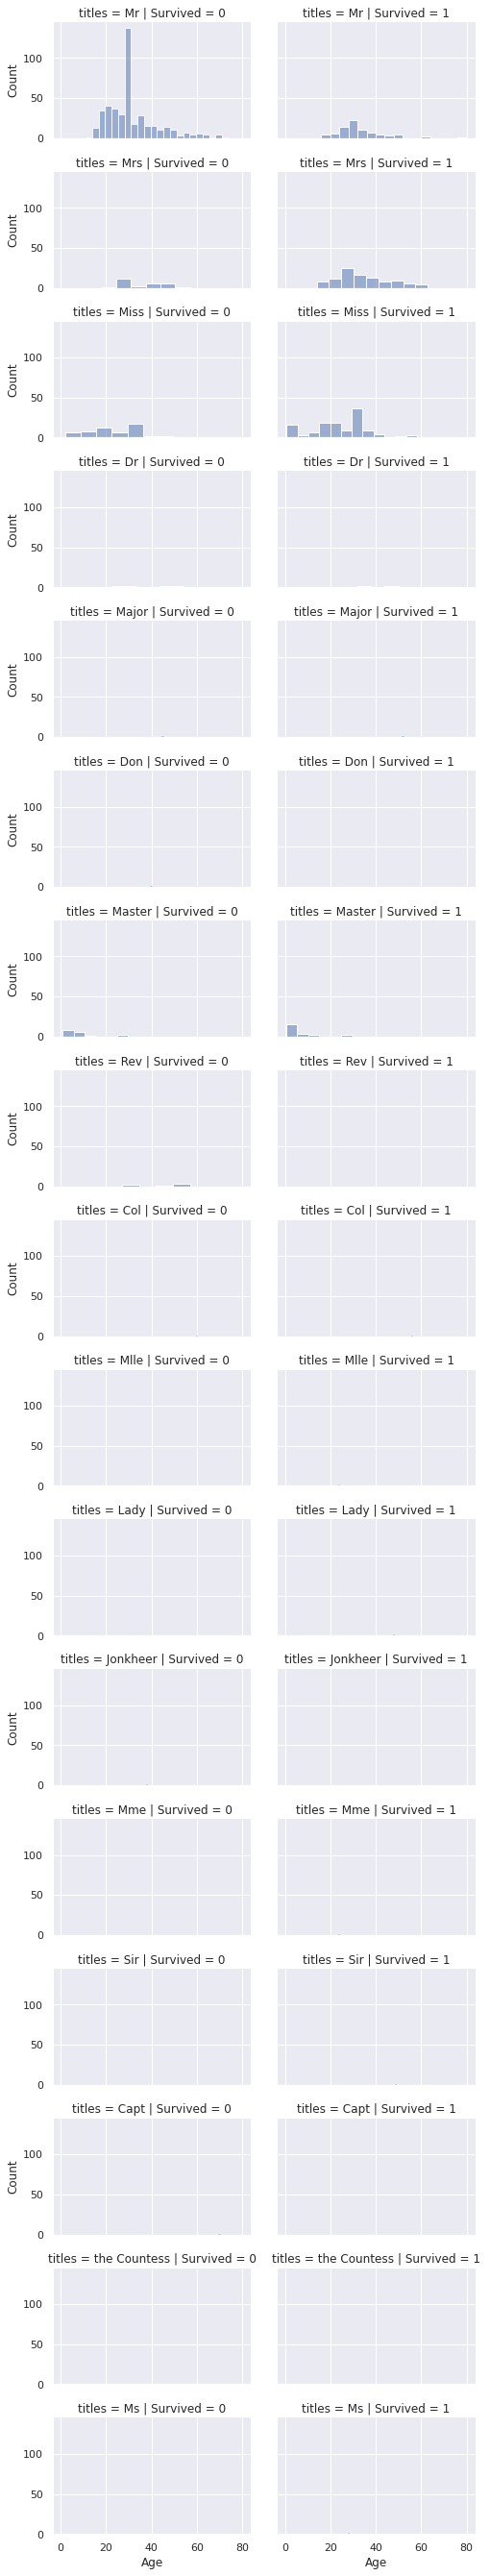

In [ ]:
grid = sns.FacetGrid(df, row="titles", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.histplot, "Age", alpha=.5)
grid.add_legend()

In [ ]:
Title_Dictionary = {
                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                    "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master",

                    
}
df["titles"].replace(Title_Dictionary,inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,titles
0,343,0,2,male,28.000000,0,0,248740,13.0000,S,Mrs
1,76,0,3,male,25.000000,0,0,348123,7.6500,S,Mrs
2,641,0,3,male,20.000000,0,0,350050,7.8542,S,Mrs
3,568,0,3,female,29.000000,0,4,349909,21.0750,S,Mrs
4,672,0,1,male,31.000000,1,0,F.C. 12750,52.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,female,14.000000,1,0,237736,30.0708,C,Mrs
887,61,0,3,male,22.000000,0,0,2669,7.2292,C,Mrs
888,535,0,3,female,30.000000,0,0,315084,8.6625,S,Miss
889,102,0,3,male,29.699118,0,0,349215,7.8958,S,Mrs


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


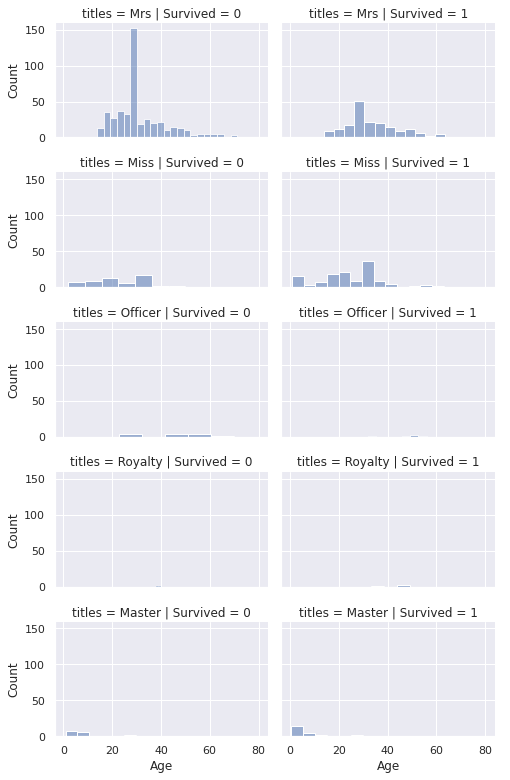

In [ ]:
grid = sns.FacetGrid(df, row="titles", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.histplot, "Age", alpha=.5)
grid.add_legend()

In [ ]:
for i in df:
    df['FamilySize'] = df['SibSp'] + df['Parch'] 

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


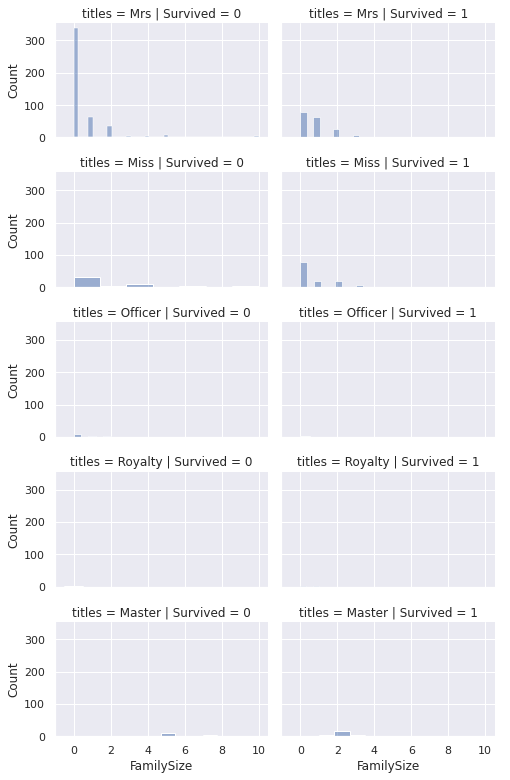

In [ ]:
grid = sns.FacetGrid(df, row="titles", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.histplot, "FamilySize", alpha=.5)
grid.add_legend()

In [ ]:
"""
df = {"sex":     {"male": 0, "female": 1}}

df = df.replace(sex)
df.head()
"""

AttributeError: ignored

In [ ]:
df['Sex'] = df['Sex'].replace(['male','female'],[0,1])


In [ ]:
df=df.drop(columns=['Ticket', 'PassengerId'])

In [ ]:
set(df["Embarked"])

{'C', 'Q', 'S'}

In [ ]:
df['Embarked'] = df['Embarked'].replace(['C', 'Q', 'S'],[0,1,2])

In [ ]:
df['Sex'] = df['Sex'].replace(['male','female'],[0,1])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titles,FamilySize
0,0,2,0,28.000000,0,0,13.0000,S,Mrs,0
1,0,3,0,25.000000,0,0,7.6500,S,Mrs,0
2,0,3,0,20.000000,0,0,7.8542,S,Mrs,0
3,0,3,1,29.000000,0,4,21.0750,S,Mrs,4
4,0,1,0,31.000000,1,0,52.0000,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.000000,1,0,30.0708,C,Mrs,1
887,0,3,0,22.000000,0,0,7.2292,C,Mrs,0
888,0,3,1,30.000000,0,0,8.6625,S,Miss,0
889,0,3,0,29.699118,0,0,7.8958,S,Mrs,0


In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titles,FamilySize
0,0,2,0,28.000000,0,0,13.0000,2,Mrs,0
1,0,3,0,25.000000,0,0,7.6500,2,Mrs,0
2,0,3,0,20.000000,0,0,7.8542,2,Mrs,0
3,0,3,1,29.000000,0,4,21.0750,2,Mrs,4
4,0,1,0,31.000000,1,0,52.0000,2,Mrs,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.000000,1,0,30.0708,0,Mrs,1
887,0,3,0,22.000000,0,0,7.2292,0,Mrs,0
888,0,3,1,30.000000,0,0,8.6625,2,Miss,0
889,0,3,0,29.699118,0,0,7.8958,2,Mrs,0


In [ ]:
 le = preprocessing.LabelEncoder()
 le.fit(df["titles"].values)
 df["titles"]=le.transform(df["titles"].values)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,titles,FamilySize
0,0,2,0,28.000000,0,0,13.0000,2,2,0
1,0,3,0,25.000000,0,0,7.6500,2,2,0
2,0,3,0,20.000000,0,0,7.8542,2,2,0
3,0,3,1,29.000000,0,4,21.0750,2,2,4
4,0,1,0,31.000000,1,0,52.0000,2,2,1
...,...,...,...,...,...,...,...,...,...,...
886,1,2,1,14.000000,1,0,30.0708,0,2,1
887,0,3,0,22.000000,0,0,7.2292,0,2,0
888,0,3,1,30.000000,0,0,8.6625,2,1,0
889,0,3,0,29.699118,0,0,7.8958,2,2,0


In [ ]:
y = df['Survived'].values
X = df.iloc[:,1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)


clf = LogisticRegression()


clf.fit(X_train, y_train)


print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


0.8188202247191011
0.776536312849162


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


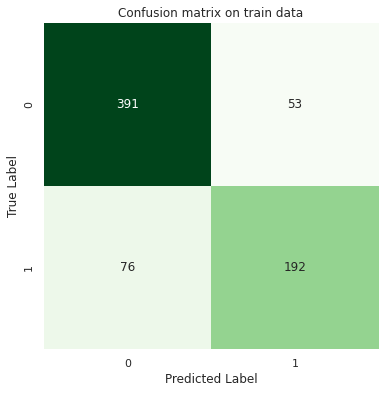

In [ ]:
train_preds = clf.predict(X_train)
cm = confusion_matrix(y_train, train_preds)

plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
test_preds = clf.predict(X_test)
cm = confusion_matrix(y_test, test_preds)


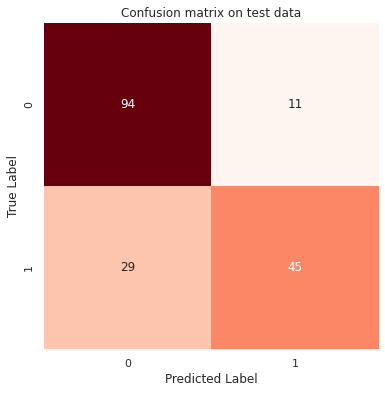

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
pred_prob1 = clf.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

In [ ]:
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print('AUC: %.3f' % auc_score1)

AUC: 0.839


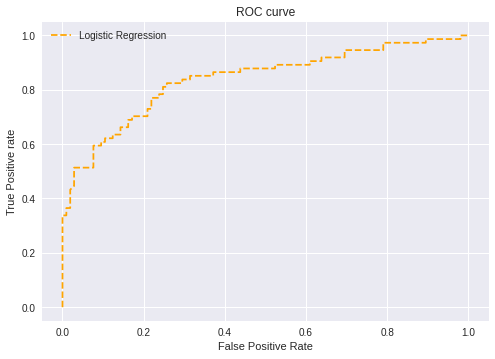

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();